In [20]:
import joblib as jb
from pathlib import Path
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

In [3]:
model_dir = Path("../models")
model = jb.load(model_dir/"final_rf_tuned.joblib")
features = jb.load(model_dir /"feature_list.joblib")
preds_saved = jb.load(model_dir / "final_pred_rf_tuned.joblib")

X_train = jb.load(model_dir / "X_train.joblib")
X_test = jb.load(model_dir / "X_test.joblib")
Y_train = jb.load(model_dir / "Y_train.joblib")
Y_test = jb.load(model_dir / "Y_test.joblib")


In [4]:
print("Loaded tuned model:", type(model).__name__)
print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)

Loaded tuned model: RandomForestRegressor
Train shape: (5922, 52)
Test shape : (1481, 52)


In [5]:
# Top 20 features are
importances = model.feature_importances_
fi = pd.Series(importances, index=features).sort_values(ascending=False)

print("Top 20 features: ")
fi.head(20)

Top 20 features: 


Votes                           0.386205
City_Freq                       0.195373
Average Cost for two            0.108627
Price range                     0.078260
Country Code                    0.073360
Cuisine_Grouped_North Indian    0.026360
Has Online delivery             0.014178
Has Table booking               0.013804
Cuisine_Grouped_Cafe            0.011380
Cuisine_Grouped_Chinese         0.007632
Cuisine_Grouped_Continental     0.007387
Cuisine_Grouped_Other           0.006902
Cuisine_Grouped_Pizza           0.005373
Cuisine_Grouped_Italian         0.005247
Cuisine_Grouped_Asian           0.004168
Cuisine_Grouped_Bakery          0.004137
Cuisine_Grouped_Fast Food       0.004032
Cuisine_Grouped_Desserts        0.003622
Cuisine_Grouped_Ice Cream       0.003250
Cuisine_Grouped_European        0.003005
dtype: float64

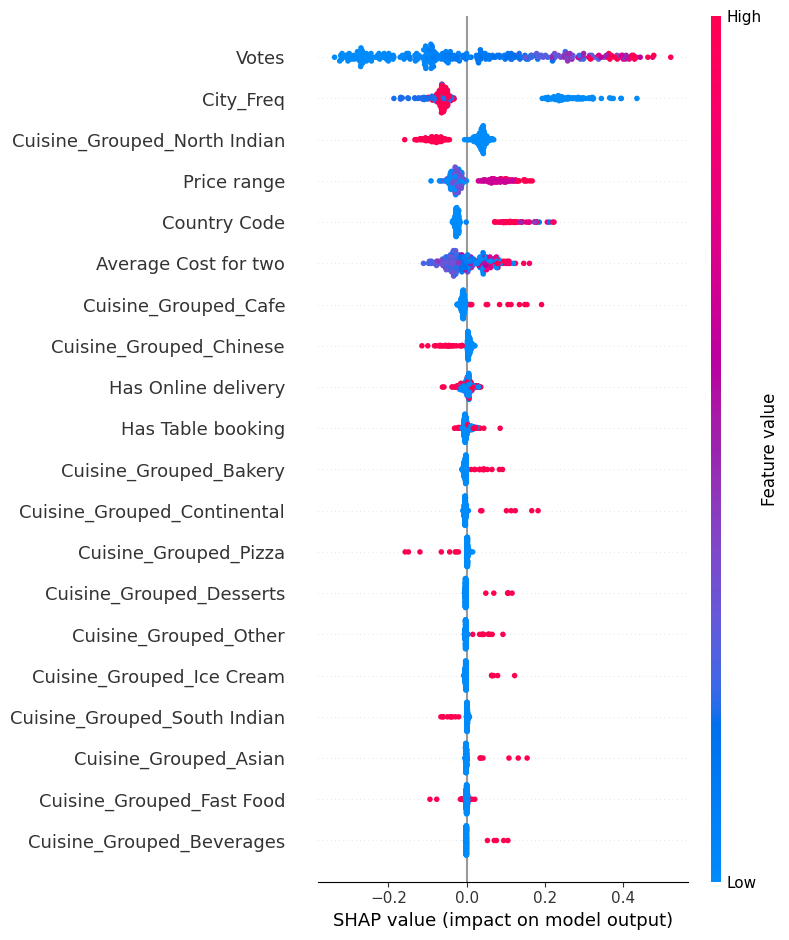

In [6]:
# Shap summary plot
explainer = shap.TreeExplainer(model)

sample = X_test.sample(300, random_state=42)

shap_values = explainer.shap_values(sample)

shap.summary_plot(shap_values, sample, plot_type="dot")

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

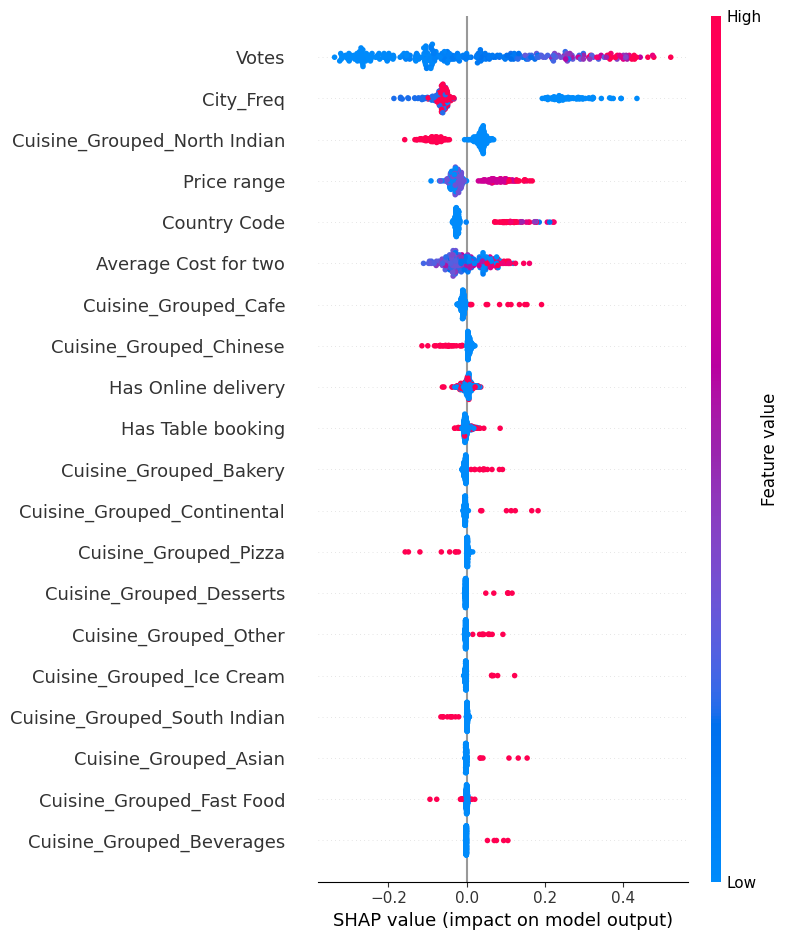

In [7]:
plt.figure(figsize=(10,8))
shap.summary_plot(shap_values, sample, plot_type="dot", show=False)
plt.savefig("../visuals/shap_summary.png", dpi = 300, bbox_inches="tight")
plt.close

In [16]:
# Local explanation of any random row from X_test
idx = 23
sample_row = X_test.iloc[[idx]]
sample_row

,Country Code,Average Cost for two,Has Table booking,Has Online delivery,Price range,Votes,City_Freq,Cuisine_Grouped_Asian,Cuisine_Grouped_BBQ,Cuisine_Grouped_Bakery,...,Cuisine_Grouped_Other,Cuisine_Grouped_Pizza,Cuisine_Grouped_Raw Meats,Cuisine_Grouped_Seafood,Cuisine_Grouped_South Indian,Cuisine_Grouped_Steak,Cuisine_Grouped_Street Food,Cuisine_Grouped_Sushi,Cuisine_Grouped_Thai,Cuisine_Grouped_Tibetan
3647,0,600,0,1,2,76,5473,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [17]:
# computing shpa values
sample_shap = shap_values[[idx]]
sample_shap_base = explainer.expected_value

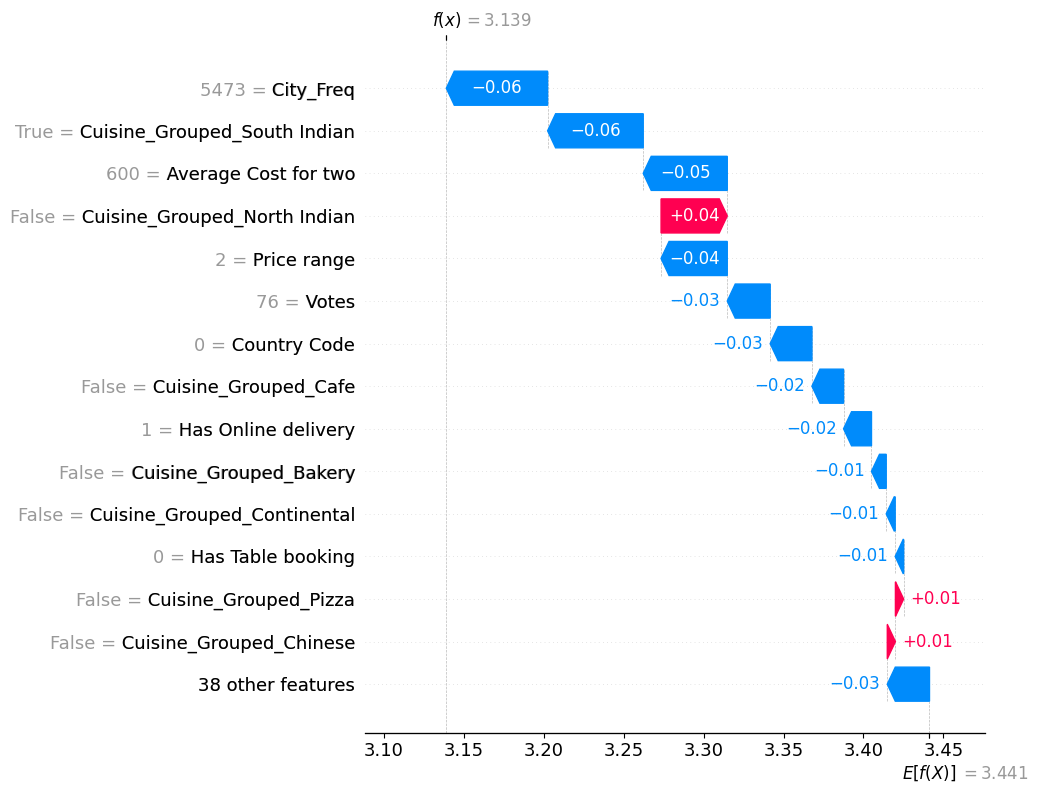

Saved Waterfall:  ../visuals/shap_local_waterfall_idx3.png


In [18]:
sample = X_test.iloc[[idx]]
shap_values_single = explainer.shap_values(sample)

exp = shap.Explanation(
    values = shap_values_single[0],
    base_values = explainer.expected_value,
    data = sample.values[0],
    feature_names = sample.columns
)

# plt.figure(figsize=(10,6))
# shap.plots.waterfall(exp, max_display=15)
# out = "../visuals/shap_local_waterfall_idx3.png"
# plt.tight_layout()
# plt.savefig(out, dpi=200, bbox_inches='tight')
# plt.close()
print("Saved Waterfall: ", out)

In [11]:
# Interactive force plot saved as HTML
explainer = shap.TreeExplainer(model)
sample = X_test.iloc[[idx]]
shap_values_single = explainer.shap_values(sample)

force_html = shap.force_plot(
    explainer.expected_value,
    shap_values_single,
    sample,
    matplotlib=False
)

out_html = "../visuals/shap_local_force_idx3.html"
shap.save_html(out_html, force_html)
print("Saved Interactive force Html: ", out_html)

Saved Interactive force Html:  ../visuals/shap_local_force_idx3.html


In [12]:
explainer = shap.TreeExplainer(model)
shap_values_full = explainer.shap_values(X_test)
row_imp = np.abs(shap_values_full).sum(axis=1)

impact_df = pd.DataFrame({
    "index":X_test.index,
    "impact": row_imp
}).sort_values(by="impact", ascending=False)

impact_df.head(10)

,index,impact
418,50,1.157608
429,7144,1.119347
1442,45,1.113318
714,573,1.112068
519,48,1.094678
28,503,1.090903
90,37,1.088691
556,2157,1.088691
613,31,1.086868
259,41,1.078946


In [13]:
best_idx = impact_df.iloc[0]["index"]
best_idx

np.float64(50.0)

In [14]:
idx = int(best_idx)

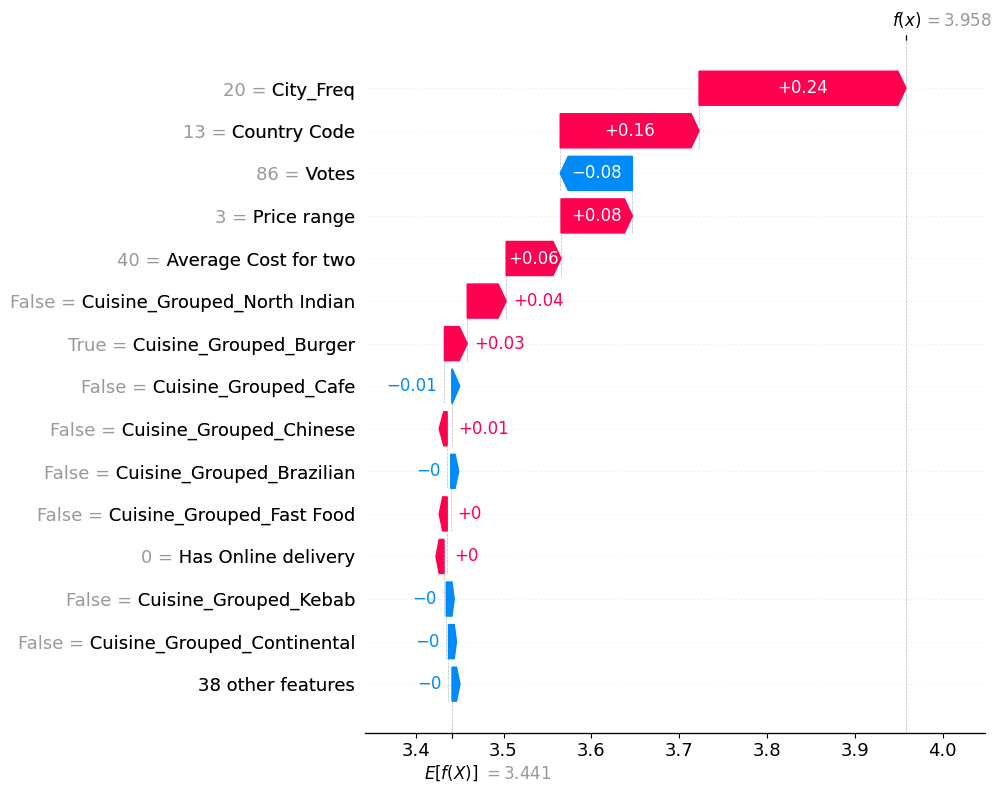

Saved Waterfall:  ../visuals/shap_local_waterfall_idx50.png


In [15]:
sample = X_test.iloc[[idx]]
shap_values_single = explainer.shap_values(sample)

exp = shap.Explanation(
    values = shap_values_single[0],
    base_values = explainer.expected_value,
    data = sample.values[0],
    feature_names = sample.columns
)

plt.figure(figsize=(10,6))
shap.plots.waterfall(exp, max_display=15)
out = "../visuals/shap_local_waterfall_idx50.png"
plt.tight_layout()
plt.savefig(out, dpi=200, bbox_inches='tight')
plt.close()
print("Saved Waterfall: ", out)

In [19]:
"""
Local explanation — index 23

For this restaurant (index 23), the model’s prediction is primarily driven up by Votes and City_Freq — many reviewers in a major food hub pushed the score higher.
Secondary positive contributors are Price range and Average Cost for two, indicating a mid-to-upmarket positioning; small negative contributions from missing convenience features slightly pulled the final rating down.
"""

"""
Local explanation — index 3

For this restaurant (index 3), the predicted rating is lifted by high Votes and the Cuisine (North Indian/Cafe) flag, but dampened by a lower city frequency and low price positioning.
Overall the prediction reflects a popular spot with strong social proof but less premium positioning than top-tier listings.
"""

'\nLocal explanation — index 3\n\nFor this restaurant (index 3), the predicted rating is lifted by high Votes and the Cuisine (North Indian/Cafe) flag, but dampened by a lower city frequency and low price positioning.\nOverall the prediction reflects a popular spot with strong social proof but less premium positioning than top-tier listings.\n'

In [22]:
# Partial Dependence plot
Path("../visuals").mkdir(parents=True, exist_ok=True)
pdp_features = ["Votes", "Average Cost for two", "City_Freq"]
save_names = ["pdp_votes.png", "pdp_cost.png", "pdp_cityfreq.png"]

Xp = X_train.copy() 
for feat, fname in zip(pdp_features, save_names):
    fig, ax = plt.subplots(figsize=(8, 5))
    display = PartialDependenceDisplay.from_estimator(
        model, Xp, [feat], kind="average", grid_resolution=50, ax=ax)
    ax.set_title(f"Partial Dependence — {feat}")
    ax.set_xlabel(feat)
    ax.set_ylabel("Predicted rating (partial)")
    out = f"../visuals/{fname}"
    plt.tight_layout()
    fig.savefig(out, dpi=200, bbox_inches="tight")
    plt.close(fig)
    print("Saved:", out)

C:\Users\adars\OneDrive\Documents\Cognifyz-ML-Internship\test\Lib\site-packages\sklearn\inspection\_partial_dependence.py:717: FutureWarning: The column 5 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


Saved: ../visuals/pdp_votes.png


C:\Users\adars\OneDrive\Documents\Cognifyz-ML-Internship\test\Lib\site-packages\sklearn\inspection\_partial_dependence.py:717: FutureWarning: The column 1 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


Saved: ../visuals/pdp_cost.png


C:\Users\adars\OneDrive\Documents\Cognifyz-ML-Internship\test\Lib\site-packages\sklearn\inspection\_partial_dependence.py:717: FutureWarning: The column 6 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


Saved: ../visuals/pdp_cityfreq.png
